In [115]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import matplotlib.dates as mdates

with open("../data/sample_rich_schema.json", "r") as f:
    schema = json.load(f)

fields = list(schema["tables"]["sample_rich"].keys())
overleaf_dir = "/Users/guanlil1/Dropbox/应用/Overleaf/DataWorkloadGen/figures/"

fontsize_title=30
fontsize_legend=20
fontsize_ticks=26

### Single Table

#### Cardinality

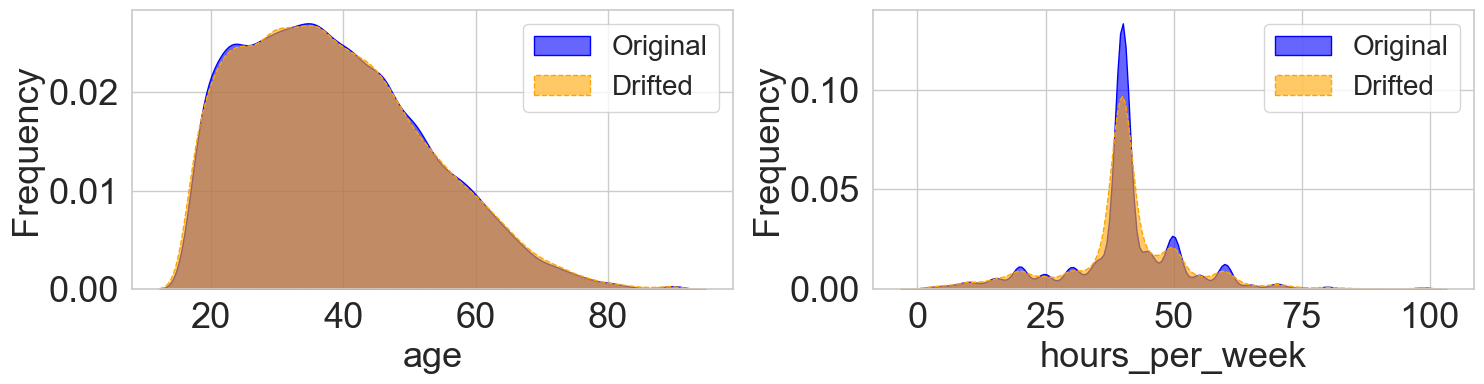

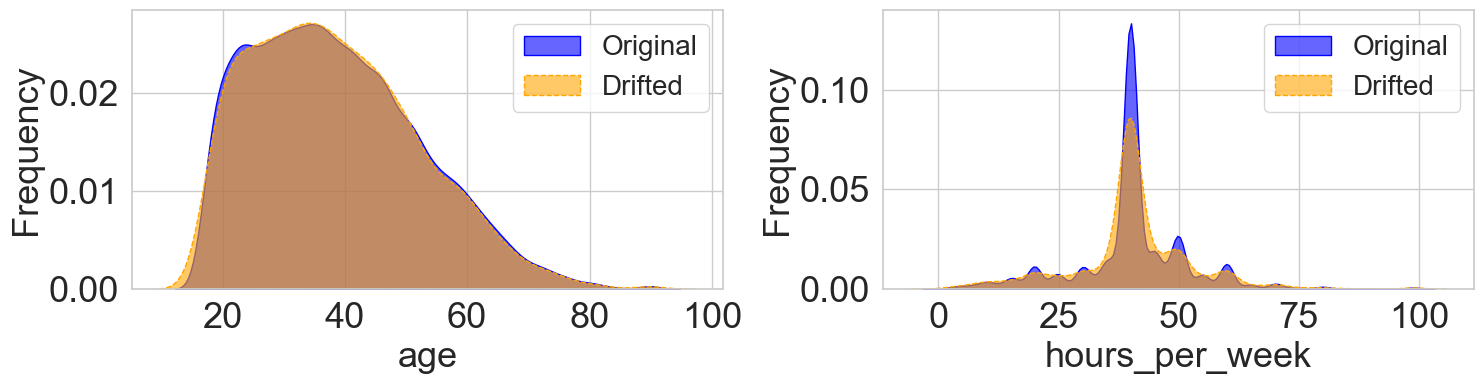

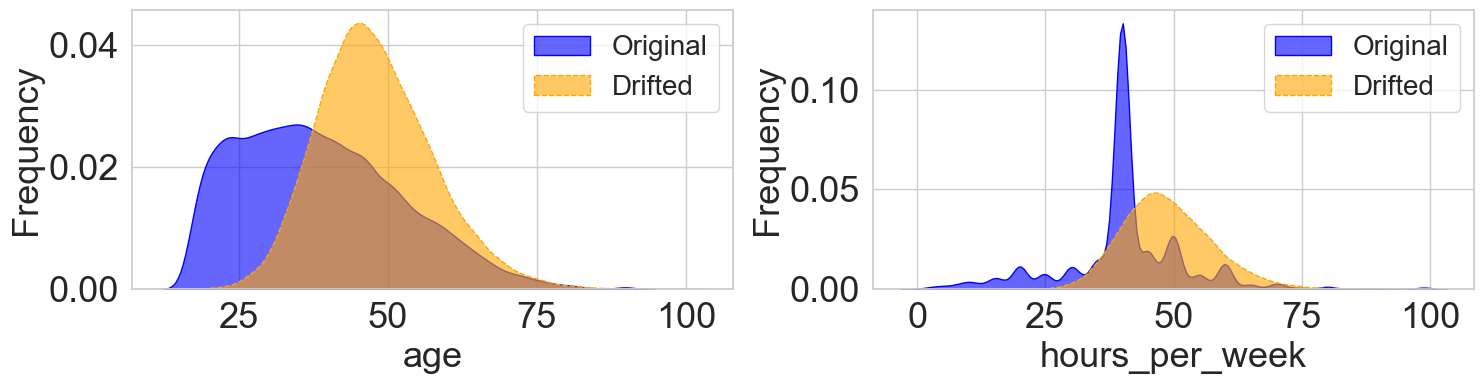

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = "case_study"
os.makedirs(output_dir, exist_ok=True)

def plop_diff(original_file, drifted_file, file_name, columns):
    original_df = pd.read_csv(original_file)
    drifted_df = pd.read_csv(drifted_file)
    # Set seaborn style
    sns.set(style="whitegrid")

    # Create subplots for each column
    num_columns = len(columns)
    fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(15, 4 * ((num_columns + 1) // 2)))
    axes = axes.flatten()
    

    # for i, col in enumerate(original_df.columns):
    for i, col in enumerate(columns):
        # if pd.api.types.is_numeric_dtype(original_df[col]):
        if not pd.api.types.is_numeric_dtype(original_df[col]):
            original_col_encoded, _ = pd.factorize(original_df[col])
            drifted_col_encoded, _ = pd.factorize(drifted_df[col])
        else:
            original_col_encoded = original_df[col]
            drifted_col_encoded = drifted_df[col]
    
        original_col_encoded = pd.Series(original_col_encoded)
        drifted_col_encoded = pd.Series(drifted_col_encoded)
        sns.kdeplot(original_col_encoded.dropna(), ax=axes[i], label='Original', color='blue', fill=True, linestyle='-', alpha=0.6)
        sns.kdeplot(drifted_col_encoded.dropna(), ax=axes[i], label='Drifted', color='orange', fill=True, linestyle='--', alpha=0.6)
        # axes[i].set_title(f"Distribution of {col}", fontsize=fontsize_title)
        # axes[i].set_title(col)

        # set xlabel font
        axes[i].set_xlabel(col, fontsize=fontsize_ticks)
        axes[i].set_ylabel("Frequency", fontsize=fontsize_ticks)
    
        # set xticks and yticks font
        axes[i].tick_params(axis='x', labelsize=fontsize_ticks)
        axes[i].tick_params(axis='y', labelsize=fontsize_ticks)
        
        axes[i].legend(fontsize=fontsize_legend)
        # else:
        #     axes[i].axis('off')  # Hide non-numeric plots
    
    # Hide any unused subplots
    # for j in range(i + 1, len(axes)):
    #     axes[j].axis('off')
    
    plt.tight_layout()
    if file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()




columns = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
columns = ["age", "education_num", "capital_gain", "hours_per_week"]
columns = ["age", "hours_per_week"]

plop_diff('../data/census_original.csv', '../data/census_original_cardinality_1.csv', "case_study_cardinality_scale_1", columns)
plop_diff('../data/census_original.csv', '../data/census_original_deletion_5000.csv', "case_study_cardinality_delete_5000", columns)
plop_diff('../data/census_original.csv', '../data/census_original_skew_2.csv', "case_study_census_original_skew_2", columns)


#### Skew

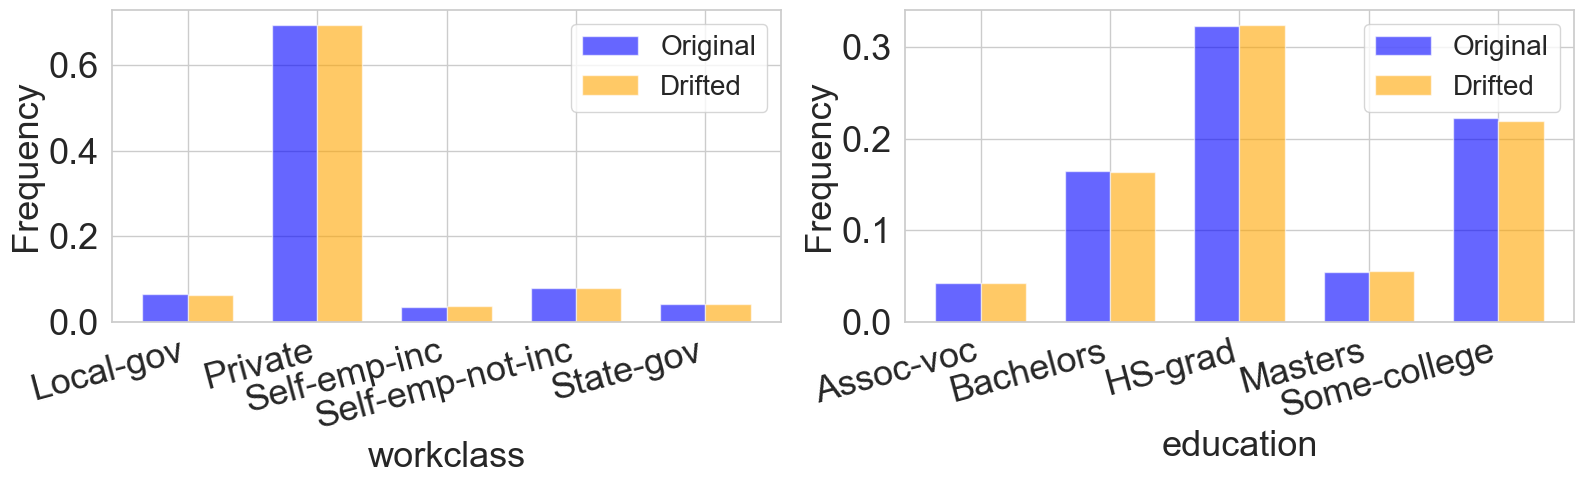

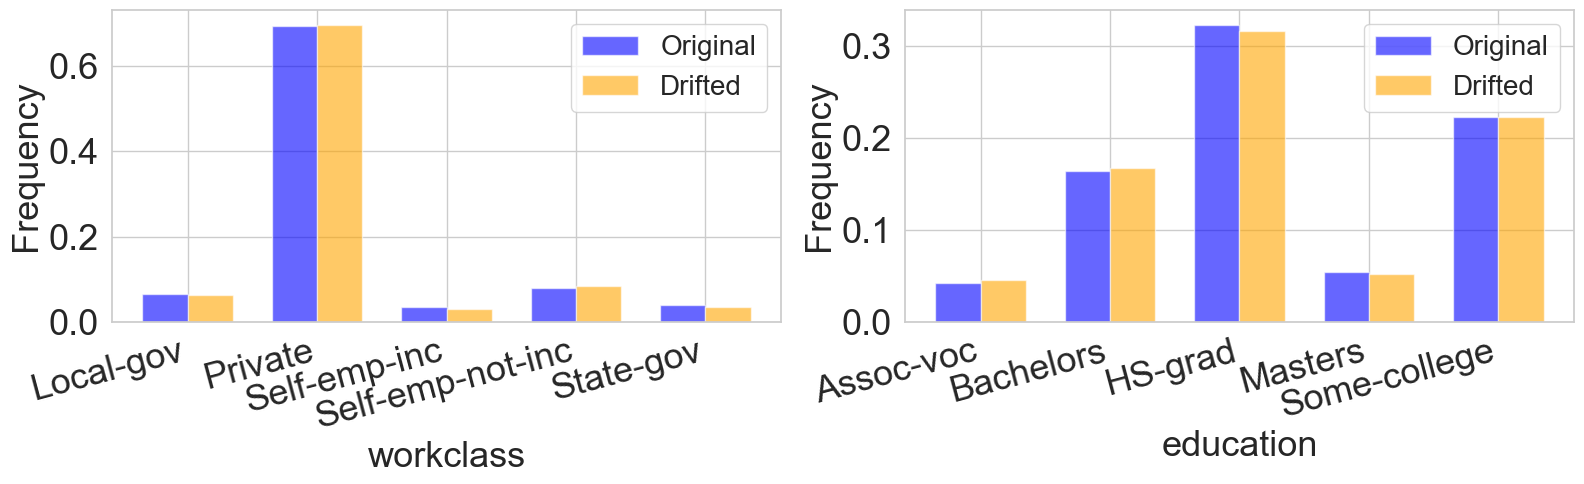

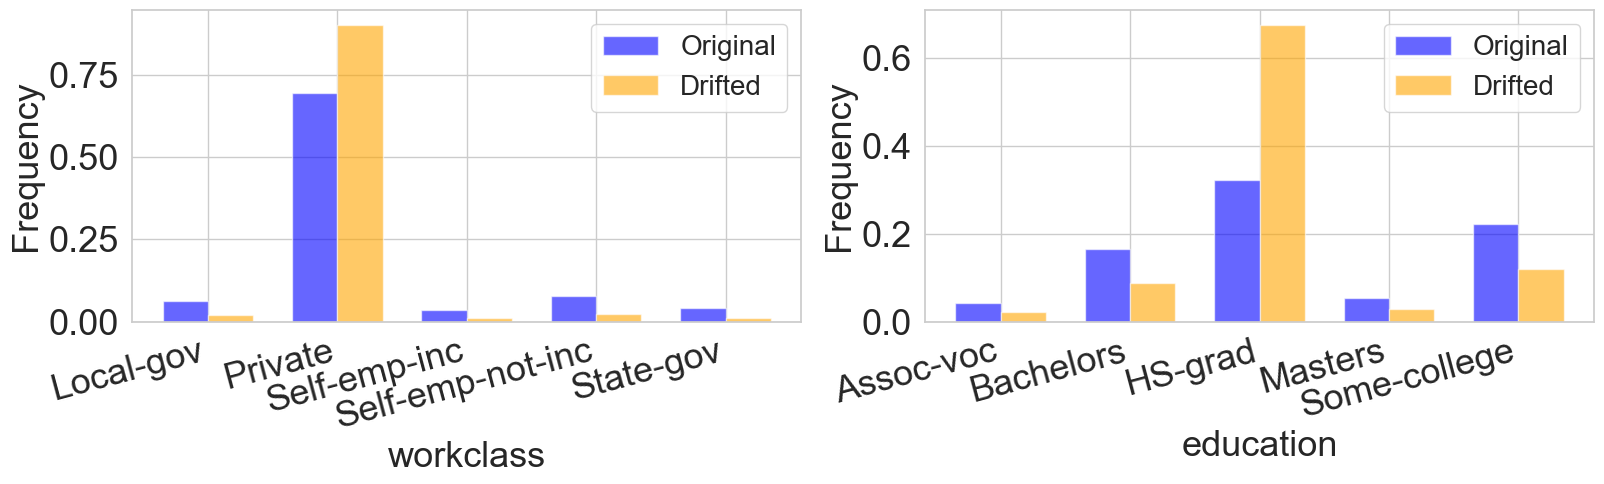

In [197]:

import pandas as pd
import matplotlib.pyplot as plt

def compare_categorical_distributions_with_subplots(original_file, drifted_file, file_name, columns):
    original_df = pd.read_csv(original_file)
    drifted_df = pd.read_csv(drifted_file)

    n = len(columns)
    fig, axes = plt.subplots(1, n, figsize=(8 * n, 5))

    if n == 1:
        axes = [axes]  # Make iterable

    # all_categories_column = [['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'],
    #                     ['Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']]
    all_categories_column = [['Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov'],
                        ['Assoc-voc', 'Bachelors', 'HS-grad', 'Masters', 'Some-college']]
    for i, column in enumerate(columns):
        original_counts = original_df[column].value_counts(normalize=True)
        drifted_counts = drifted_df[column].value_counts(normalize=True)

        # Align categories
        # all_categories = sorted(set(original_counts.index).union(set(drifted_counts.index)))
        all_categories = all_categories_column[i]
        
        original_counts = original_counts.reindex(all_categories, fill_value=0)
        drifted_counts = drifted_counts.reindex(all_categories, fill_value=0)

        x = range(len(all_categories))
        width = 0.35

        axes[i].bar(x, original_counts.values, width=width, label='Original', color='blue', alpha=0.6)
        axes[i].bar([j + width for j in x], drifted_counts.values, width=width, label='Drifted', color='orange', alpha=0.6)
        
        axes[i].set_xticks([j + width / 2 for j in x])
        # axes[i].set_xticklabels(all_categories, rotation=45, ha='right', fontsize=fontsize_title- 4)
        # print(all_categories)
        axes[i].set_xticklabels(all_categories, rotation=15, ha='right', fontsize=fontsize_title- 4)
        axes[i].set_ylabel("Frequency", fontsize=fontsize_title - 4)
        axes[i].set_xlabel(f"{column}", fontsize=fontsize_ticks)
        
        axes[i].tick_params(axis='y', labelsize=fontsize_ticks)
        # axes[i].tick_params(axis='x', labelsize=fontsize_ticks)
        # axes[i].set_title(f"{file_name} - Distribution of '{column}'", fontsize=fontsize_title- 4)
        axes[i].legend(fontsize=fontsize_legend)

    plt.tight_layout()
    if file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()



compare_categorical_distributions_with_subplots(
    '../data/census_original.csv', 
    '../data/census_original_cardinality_1.csv', 
    "case_study_cardinality_scale_1_categorical", 
    columns=["workclass", "education"]
)
compare_categorical_distributions_with_subplots(
    '../data/census_original.csv', 
    '../data/census_original_deletion_5000.csv', 
    "case_study_cardinality_delete_5000_categorical", 
    columns=["workclass", "education"]
)



compare_categorical_distributions_with_subplots(
    original_file="../data/census_original.csv",
    drifted_file="../data/census_original_skew_2.csv",
    file_name="case_study_census_original_skew_2_categorical",
    columns=["workclass", "education"]
)

#### outliers

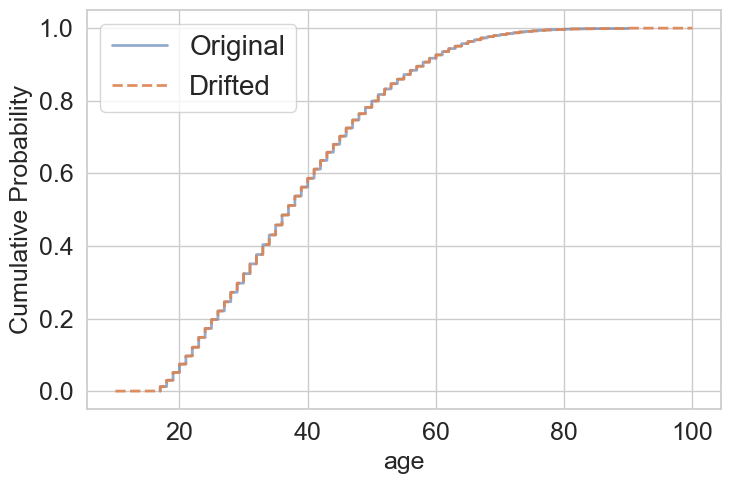

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rankdata
from sklearn.linear_model import LinearRegression

def plot_cdf_comparison(original_csv, drifted_csv, file_name, columns):
    original_df = pd.read_csv(original_csv)
    drifted_df = pd.read_csv(drifted_csv)
    
    n_cols = 2
    n_rows = int(np.ceil(len(columns) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        if not pd.api.types.is_numeric_dtype(original_df[col]):
            original_col_encoded, _ = pd.factorize(original_df[col])
            drifted_col_encoded, _ = pd.factorize(drifted_df[col])
        else:
            original_col_encoded = original_df[col].dropna()
            drifted_col_encoded = drifted_df[col].dropna()

        original_sorted = np.sort(original_col_encoded)
        drifted_sorted = np.sort(drifted_col_encoded)

        original_cdf = np.arange(1, len(original_sorted) + 1) / len(original_sorted)
        drifted_cdf = np.arange(1, len(drifted_sorted) + 1) / len(drifted_sorted)

        # Plot CDF
        axes[i].plot(original_sorted, original_cdf, linestyle='-', label='Original', alpha=0.6, linewidth=2)
        axes[i].plot(drifted_sorted, drifted_cdf, linestyle='--', label='Drifted', alpha=0.9, linewidth=2)
        
        axes[i].set_ylabel("Cumulative Probability", fontsize=fontsize_ticks-8)
        axes[i].set_xlabel(f"{col}", fontsize=fontsize_ticks-8)
        axes[i].tick_params(axis='y', labelsize=fontsize_ticks-8)
        axes[i].tick_params(axis='x', labelsize=fontsize_ticks-8)

        # axes[i].set_title(f"CDF of {col}", fontsize=fontsize_title-8)
        axes[i].legend(fontsize=fontsize_legend)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    if file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()

columns = ["age"]
plot_cdf_comparison('../data/census_original.csv', '../data/census_original_outlier.csv', "case_study_census_original_outlier", columns)

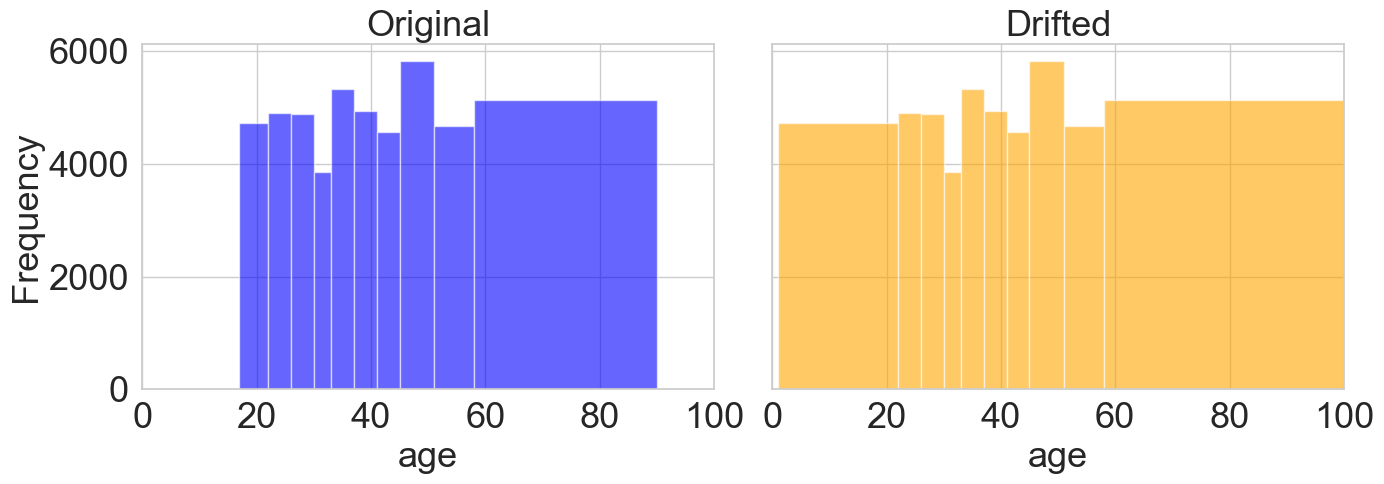

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_histogram_comparison(original_csv, drifted_csv, file_name, column, bins=10):
    original_df = pd.read_csv(original_csv)
    drifted_df = pd.read_csv(drifted_csv)

    orig_values = original_df[column].dropna().sort_values().to_numpy()
    drift_values = drifted_df[column].dropna().sort_values().to_numpy()

    # print(f"Drifted min: {np.min(drift_values)}, max: {np.max(drift_values)}")

    # PostgreSQL-style bin edges: equal-frequency bins
    def get_pg_bins(values, num_bins):
        if len(values) < num_bins:
            num_bins = len(values)
        quantiles = np.linspace(0, 1, num_bins + 1)
        return np.quantile(values, quantiles)

    bin_edges = get_pg_bins(orig_values, bins)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

      
    
    axes[0].hist(orig_values, bins=bin_edges, color='blue', alpha=0.6)
    axes[0].set_title("Original", fontsize=fontsize_ticks)
    axes[0].set_xlabel(column, fontsize=fontsize_ticks)
    axes[0].set_ylabel("Frequency", fontsize=fontsize_ticks)

    drift_bin_edges = get_pg_bins(drift_values, bins)
    

    axes[1].hist(drift_values, bins=drift_bin_edges, color='orange', alpha=0.6)
    axes[1].set_title("Drifted", fontsize=fontsize_ticks)
    axes[1].set_xlabel(column, fontsize=fontsize_ticks)

    plt.tight_layout()
    xmin = min(orig_values.min(), drift_values.min())
    xmax = max(orig_values.max(), drift_values.max())

    axes[0].set_xlim(0, xmax)
    axes[1].set_xlim(0, xmax)



    # set xticks and yticks font
    axes[0].tick_params(axis='x', labelsize=fontsize_ticks)
    axes[0].tick_params(axis='y', labelsize=fontsize_ticks)
    axes[1].tick_params(axis='x', labelsize=fontsize_ticks)


    plt.tight_layout()

    output_dir = "output_histograms"
    os.makedirs(output_dir, exist_ok=True)

    if file_name:
        plt.savefig(os.path.join(output_dir, f"{file_name}.png"), format='png', dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(overleaf_dir, f"{file_name}.pdf"), format='pdf', bbox_inches='tight')
    plt.show()


plot_histogram_comparison(
    original_csv="../data/census_original.csv",
    drifted_csv="../data/census_original_outlier.csv",
    file_name="case_study_histogram_age_comparison",
    column="age",
    bins=10
)
